In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [3]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# PRINT THE SHAPE OF DATA

In [5]:
x_train.shape, y_train.shape, "***************", x_test.shape, y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

In [8]:
class_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
# SHOW IMAGE

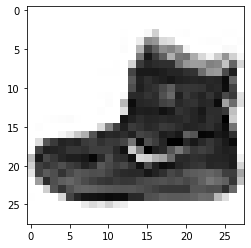

In [11]:
plt.imshow(x_train[0], cmap='Greys')

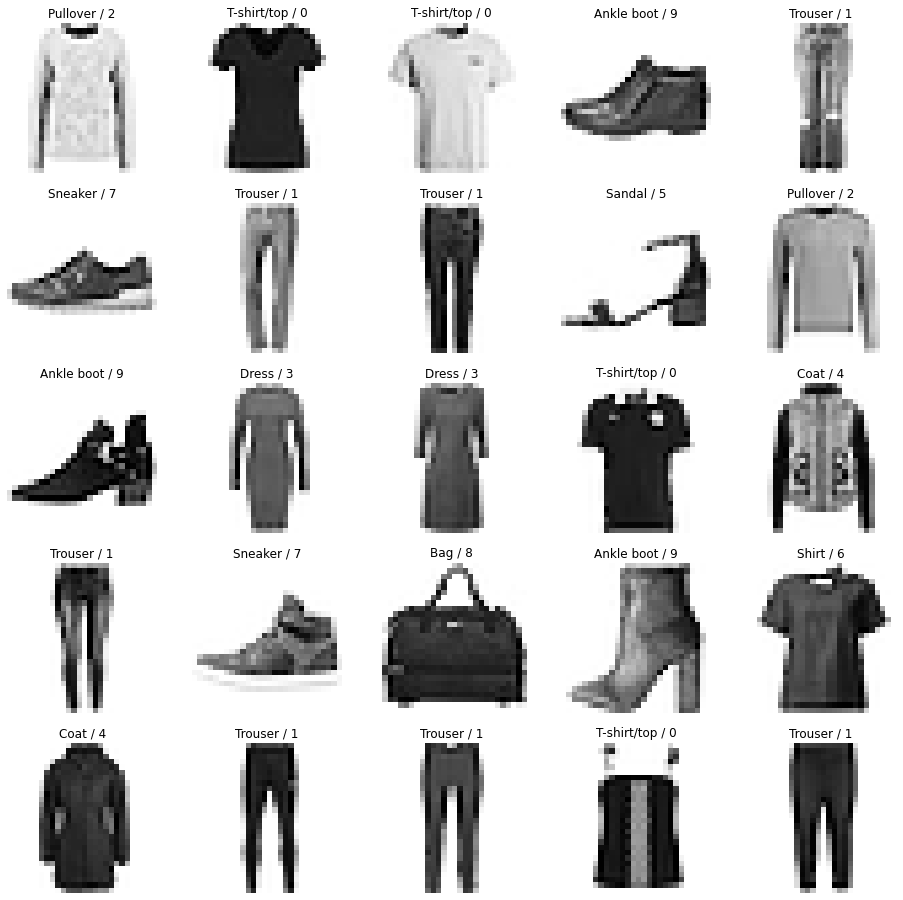

In [12]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(x_train[i], cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [13]:
x_train.ndim

3

In [14]:
x_train=np.expand_dims(x_train, -1)

In [15]:
x_train.ndim

4

In [16]:
x_test=np.expand_dims(x_test, -1)

In [17]:
# FEATURE SCALING

In [18]:
x_train=x_train/255
x_test=x_test/255

In [19]:
# SPLIT DATASET

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=0.2, random_state=2020)

In [21]:
x_train.shape, x_validation.shape, y_train.shape, y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [22]:
# BUILDING CNN MODEL

In [23]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3,  strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [24]:
# SUMMARY OF THE MODEL
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [25]:
# COMPILE THE MODEL
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# TRAIN THE MODEL
model.fit(x_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 22s 222ms/step - loss: 0.6498 - accuracy: 0.7783 - val_loss: 0.4562 - val_accuracy: 0.8347
Epoch 2/10
94/94 [==============================] - 19s 201ms/step - loss: 0.3936 - accuracy: 0.8631 - val_loss: 0.3879 - val_accuracy: 0.8663
Epoch 3/10
94/94 [==============================] - 19s 207ms/step - loss: 0.3441 - accuracy: 0.8794 - val_loss: 0.3395 - val_accuracy: 0.8823
Epoch 4/10
94/94 [==============================] - 18s 195ms/step - loss: 0.3161 - accuracy: 0.8888 - val_loss: 0.3245 - val_accuracy: 0.8852
Epoch 5/10
94/94 [==============================] - 18s 194ms/step - loss: 0.2942 - accuracy: 0.8961 - val_loss: 0.3136 - val_accuracy: 0.8893
Epoch 6/10
94/94 [==============================] - 21s 225ms/step - loss: 0.2744 - accuracy: 0.9019 - val_loss: 0.3072 - val_accuracy: 0.8907
Epoch 7/10
94/94 [==============================] - 18s 195ms/step - loss: 0.2585 - accuracy: 0.9074 - val_loss: 0.3118 - val_accuracy: 0.8880

In [28]:
# TEST THE MODEL

In [29]:
y_pred=model.predict(x_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.12, 0.02, 0.  ]], dtype=float32)

In [30]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2752 - accuracy: 0.9018


[0.275167852640152, 0.9017999768257141]

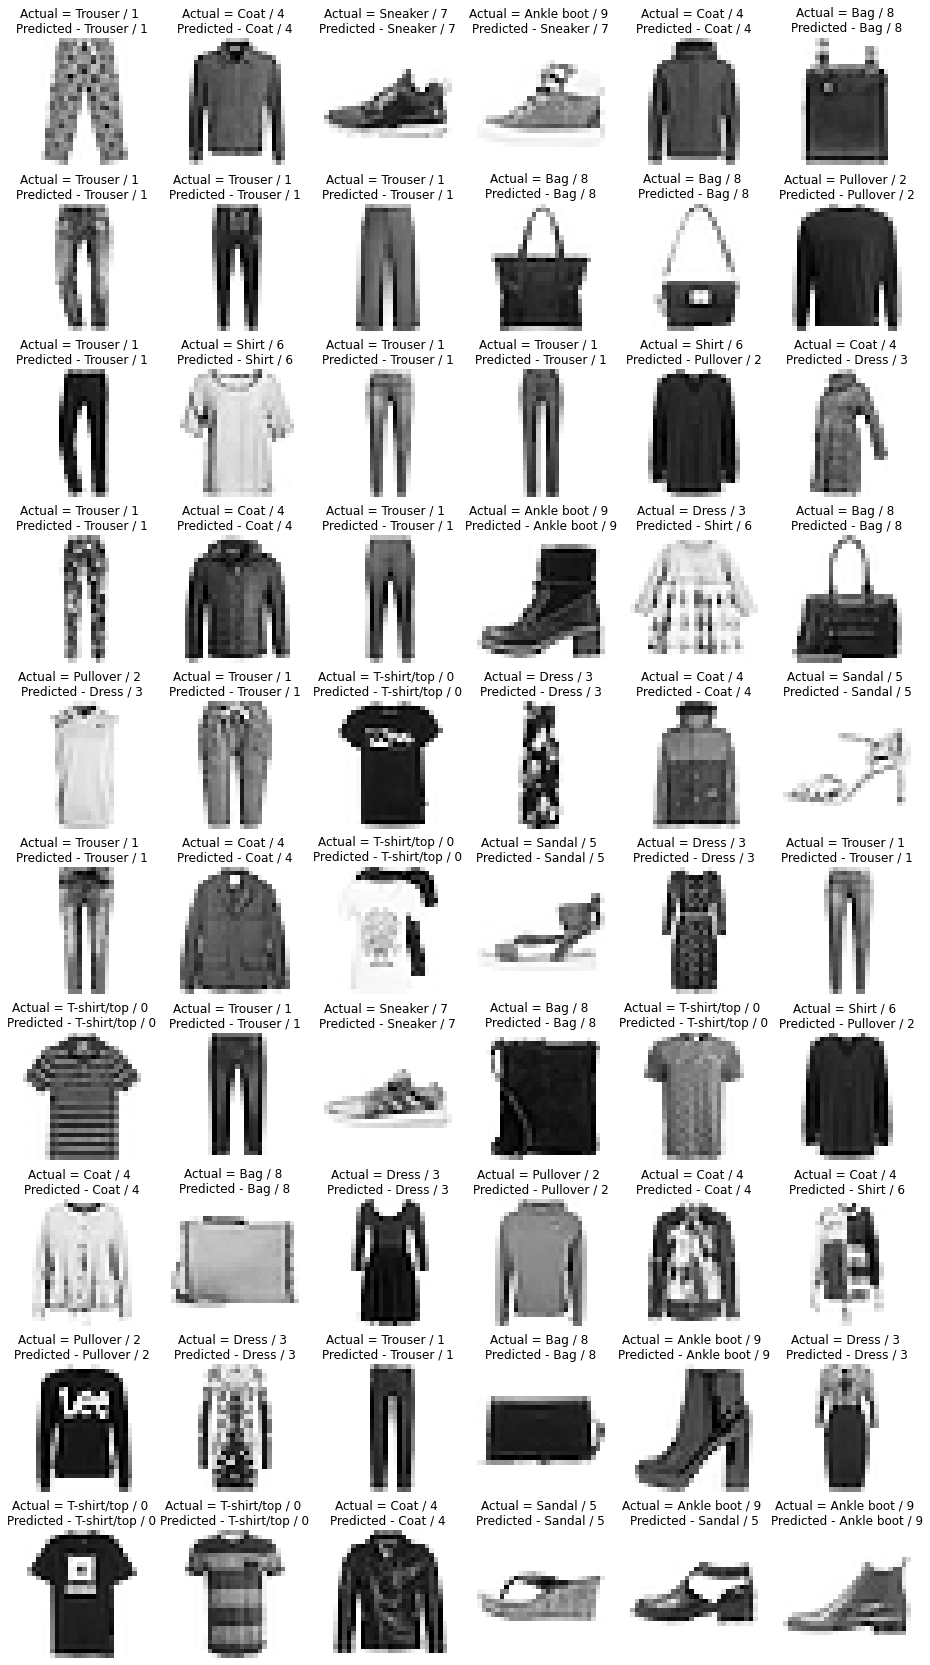

In [32]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted - {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis('off')

In [33]:
# EVALUATE THE MODEL
# CONFUSION MATRIX

In [34]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

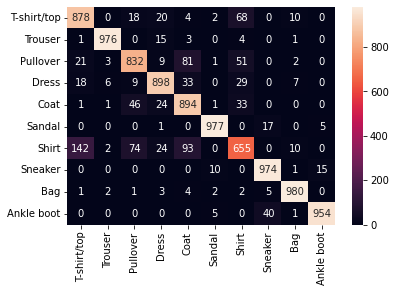

In [35]:
# SHOW THE CONFUSION MATRIX
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [36]:
# SHOW THE CLASSIFICATION REPORT
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.83      0.84      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.80      0.89      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.78      0.66      0.71      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [37]:
# SAVE THE MODEL

In [38]:
model.save('fashion_mnist_cnn_model.h5')